In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [2]:
# Get the stock quote
df = DataReader('MSFT', data_source='yahoo', start='2021-01-04', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,223.000000,214.809998,222.529999,217.690002,37130100.0,215.434967
2021-01-05,218.520004,215.699997,217.259995,217.899994,23823000.0,215.642776
2021-01-06,216.490005,211.940002,212.169998,212.250000,35930700.0,210.051300
2021-01-07,219.339996,213.710007,214.039993,218.289993,27694500.0,216.028748
2021-01-08,220.580002,217.029999,218.679993,219.619995,22956200.0,217.344971
...,...,...,...,...,...,...
2022-03-29,315.820007,309.049988,313.910004,315.410004,30393400.0,315.410004
2022-03-30,315.950012,311.579987,313.760010,313.859985,28163600.0,313.859985
2022-03-31,315.140015,307.890015,313.899994,308.309998,33422100.0,308.309998


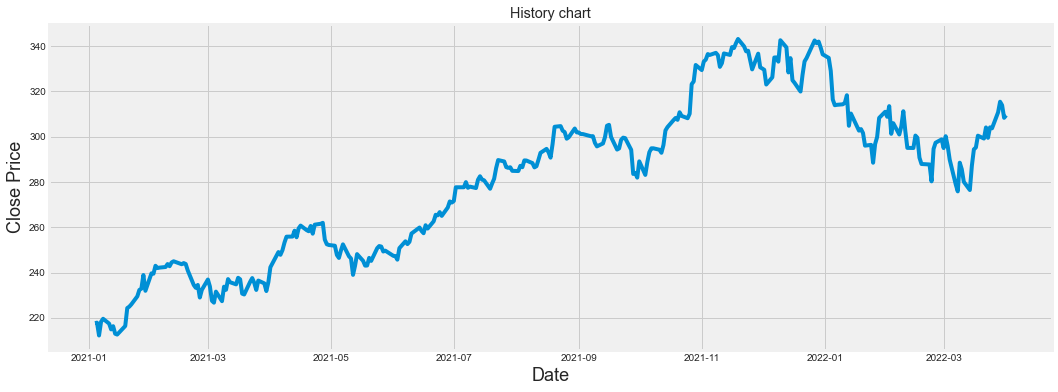

In [3]:
plt.figure(figsize=(16,6))
plt.title('History chart')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [4]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

301

In [5]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04157117],
       [0.04317587],
       [0.        ],
       [0.04615615],
       [0.0563197 ],
       [0.04004284],
       [0.02047985],
       [0.03125475],
       [0.00588418],
       [0.00305666],
       [0.03201897],
       [0.09238879],
       [0.09720314],
       [0.10469203],
       [0.13204952],
       [0.15344646],
       [0.1578022 ],
       [0.20388198],
       [0.15061905],
       [0.20938405],
       [0.20831421],
       [0.23498398],
       [0.2274186 ],
       [0.22887055],
       [0.23093386],
       [0.24086816],
       [0.23360852],
       [0.24637024],
       [0.25019111],
       [0.24033318],
       [0.24415406],
       [0.24102091],
       [0.21947122],
       [0.17010543],
       [0.16062973],
       [0.17041117],
       [0.12792303],
       [0.15382857],
       [0.18867496],
       [0.16521471],
       [0.11699526],
       [0.11065259],
       [0.14786801],
       [0.11569617],
       [0.16452698],
       [0.15413419],
       [0.19012691],
       [0.179

In [6]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.04157117, 0.04317587, 0.        , 0.04615615, 0.0563197 ,
       0.04004284, 0.02047985, 0.03125475, 0.00588418, 0.00305666,
       0.03201897, 0.09238879, 0.09720314, 0.10469203, 0.13204952,
       0.15344646, 0.1578022 , 0.20388198, 0.15061905, 0.20938405,
       0.20831421, 0.23498398, 0.2274186 , 0.22887055, 0.23093386,
       0.24086816, 0.23360852, 0.24637024, 0.25019111, 0.24033318,
       0.24415406, 0.24102091, 0.21947122, 0.17010543, 0.16062973,
       0.17041117, 0.12792303, 0.15382857, 0.18867496, 0.16521471,
       0.11699526, 0.11065259, 0.14786801, 0.11569617, 0.16452698,
       0.15413419, 0.19012691, 0.17958125, 0.17239798, 0.19455914,
       0.18943907, 0.14114323, 0.13831582, 0.18141532, 0.19356568,
       0.17736519, 0.15352284, 0.1851597 , 0.175684  , 0.14977845])]
[0.17973411971026265]

[array([0.04157117, 0.04317587, 0.        , 0.04615615, 0.0563197 ,
       0.04004284, 0.02047985, 0.03125475, 0.00588418, 0.00305666,
       0.03201897, 0.09238879, 0.09

In [7]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=256)

Epoch 1/256
2/2 [==============================] - 9s 197ms/step - loss: 0.3530
Epoch 2/256
2/2 [==============================] - 0s 189ms/step - loss: 0.0987
Epoch 3/256
2/2 [==============================] - 0s 187ms/step - loss: 0.0328
Epoch 4/256
2/2 [==============================] - 0s 187ms/step - loss: 0.0507
Epoch 5/256
2/2 [==============================] - 0s 186ms/step - loss: 0.0082
Epoch 6/256
2/2 [==============================] - 0s 188ms/step - loss: 0.0172
Epoch 7/256
2/2 [==============================] - 0s 186ms/step - loss: 0.0251
Epoch 8/256
2/2 [==============================] - 0s 188ms/step - loss: 0.0198
Epoch 9/256
2/2 [==============================] - 0s 175ms/step - loss: 0.0099
Epoch 10/256
2/2 [==============================] - 0s 186ms/step - loss: 0.0063
Epoch 11/256
2/2 [==============================] - 0s 186ms/step - loss: 0.0102
Epoch 12/256
2/2 [==============================] - 0s 184ms/step - loss: 0.0122
Epoch 13/256
2/2 [===================

In [8]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6.6919256825715365

C:\Users\ASUS\AppData\Local\Temp/ipykernel_12468/1906463444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


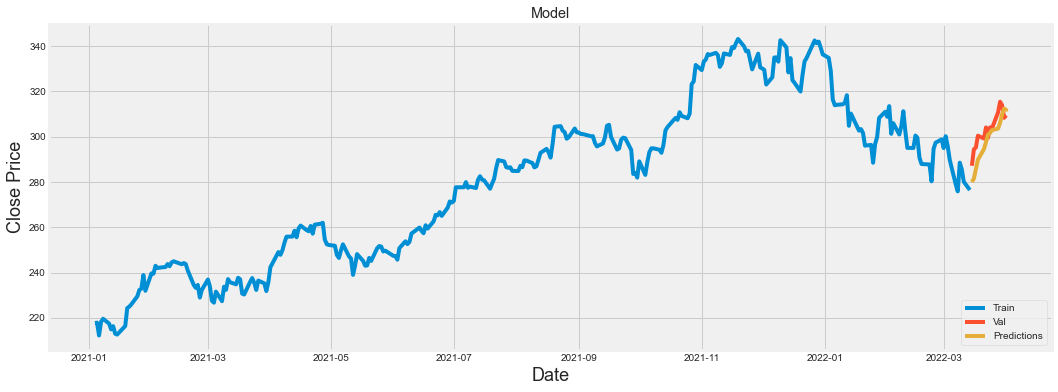

In [9]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [10]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-03-15,287.149994,279.963989
2022-03-16,294.390015,281.480682
2022-03-17,295.220001,285.662598
2022-03-18,300.429993,289.800110
2022-03-21,299.160004,294.518372
2022-03-22,304.059998,297.618225
2022-03-23,299.489990,300.890320
2022-03-24,304.100006,301.617798
2022-03-25,303.679993,302.865906
